# 비지도학습
- 잠재변수(latent variables)
  - generative / discriminative
  - 생성과 판별
  - 생성 network : AE, VAE, GAN
  - 판별 network : tree model, FFNN, CNN
- Upsampling
 - target이 자기자신(추출된 특성이 다시 원본으로 복원하는 과정에서 사이즈를 확대)
- KL Divergency
  - Cross Entropy cost function
  - 실제, 생성 데이터 2개가 출력, 
  이 두 Cross Entropy의 차이를 계산하는 것(분포차 계산)
- AE (Auto Encoder) : RBM에서 FFNN망으로 확대
- VAE(variationalAE) : 추출된 특징에 분산을 추가(정규분포로부터) => 다양한 출력을 생성
- GAN(generative adverserial network) :
  - fake image generator / real image
  - discriminator를 이용해서 판별
  - 판별 결과로 generator의 가중치를 수정

In [1]:
import numpy as np
print(np.sum((10,20)))
np.prod((10,20))
import tensorflow as tf
input_shape=(2,2,1,3)
x=np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y=tf.keras.layers.UpSampling2D(size=(1,2))(x)
print(y)

30
[[[[ 0  1  2]]

  [[ 3  4  5]]]


 [[[ 6  7  8]]

  [[ 9 10 11]]]]
tf.Tensor(
[[[[ 0  1  2]
   [ 0  1  2]]

  [[ 3  4  5]
   [ 3  4  5]]]


 [[[ 6  7  8]
   [ 6  7  8]]

  [[ 9 10 11]
   [ 9 10 11]]]], shape=(2, 2, 2, 3), dtype=int64)


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,UpSampling2D, Flatten,Reshape
import matplotlib.pyplot as plt
import numpy as np
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
autoencoder=Sequential()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28, 1)

In [3]:
# batch_size=128
# 128 x 28 x 28 x 1
# 필터 사이즈 3 x 3
# 학습될 이미지가 입력
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu')) # 128 x 28 x 28 x 16
autoencoder.add(MaxPooling2D(pool_size=2,padding='same')) # 128 x 14 x 14 x 16
autoencoder.add(Conv2D(8,kernel_size=3,activation='relu',padding='same')) # 128 x 14 x 14 x 8
autoencoder.add(MaxPooling2D(pool_size=2,padding='same')) # 128 x 7 x 7 x 8
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',activation='relu')) # 128 x 4 x 4 x 8 => 데이터 압축

# 뒷단에는 FFNN이 붙어야함 => decoder가 대신함


autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu')) # 128 x 4 x 4 x 8 
autoencoder.add(UpSampling2D()) # 128 x 8 x 8 x 8
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu')) # 128 x 8 x 8 x 8
autoencoder.add(UpSampling2D()) # 128 x 16 x 16 x 8
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu')) # 128 x 14 x 14 x 8
autoencoder.add(UpSampling2D()) # 128 x 28 x 28 x 8
# 원본이미지로 복원
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

Epoch 1/50
469/469 [==============================] - 19s 9ms/step - loss: 0.1987 - val_loss: 0.1306
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1213 - val_loss: 0.1126
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1103 - val_loss: 0.1061
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1054 - val_loss: 0.1027
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1023 - val_loss: 0.0997
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0999 - val_loss: 0.0979
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0982 - val_loss: 0.0962
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0967 - val_loss: 0.0948
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0956 - val_loss: 0.0937
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0945 - val_loss: 0.092

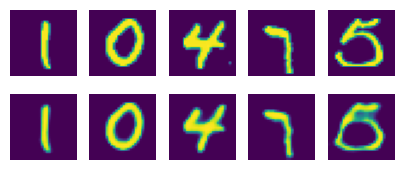

In [4]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=50,batch_size=128,validation_data=(X_test,X_test))

random_test=np.random.randint(X_test.shape[0],size=5)
ae_imgs=autoencoder.predict(X_test) # 복원된 데이터
plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
  ax=plt.subplot(2,7,i+1)
  plt.imshow(X_test[image_idx].reshape(28,28)) # 원본 데이터
  ax.axis('off')
  ax=plt.subplot(2,7,7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28,28)) # 복원된 데이터 이미지
  ax.axis('off')
plt.show()

In [ ]:
# 문제 
# 비지도 학습의 결과를 분류기에 입력하기 위해서 압축 표현된 결과값을 얻고 싶은 경우
# 이를 획득하기 위해 network 구조를 변경해보시오

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf

(x_train,_),(x_test,_)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
latent_dim=64
class Autoencoder(Model):
  def __init__(self,encoding_dim):
    super(Autoencoder,self).__init__()
    self.latent_dim=latent_dim
    # network를 2개로 분할
    self.encoder=tf.keras.Sequential([ # 순차적으로 진행
        layers.Flatten(), # 784
        # 784 x 64 # 학습결과 => pca한 것과 같음
        layers.Dense(latent_dim,activation='relu'), # 마지막 계산된 것이 리턴
    ])
    self.decoder=tf.keras.Sequential([
        layers.Dense(784,activation='sigmoid'),
        layers.Reshape((28,28))
    ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [13]:
autoencoder.fit(x_train,x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0234 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [15]:
encoded_imgs=autoencoder.encoder(x_test).numpy() # 784의 이미지가 64의 이미지로 압축
# 64의 이미지로 압축된 결과를 가지고 후작업을 해야 함(분류 등)
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

In [17]:
encoded_imgs.shape # 10000 테스트 데이터 장수 

(10000, 64)

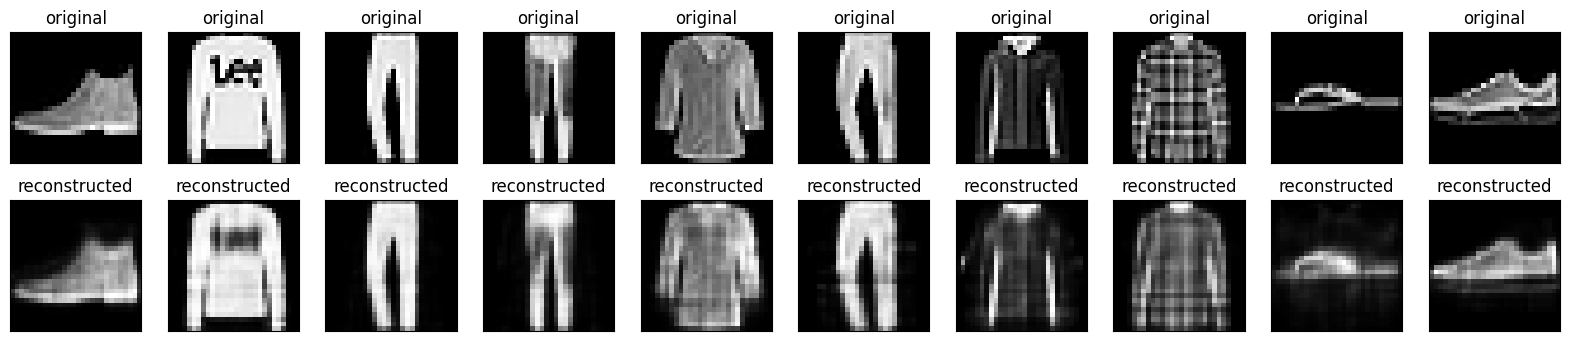

In [16]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title('reconstructed') # 재구축이미지
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 문제
# PCA와 같은 결과인 데이터를 찾아보시오

# AE를 이용한 denoising
- noise를 제거하는 모델을 생성
- 학습할 때 데이터에 noise를 추가해서 학습
- 공통부분을 학습하면서 noise를 제거 ( 들어온 데이터가 noise임 을 알 수 있게)

In [18]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train[...,tf.newaxis]
x_test=x_test[...,tf.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


In [19]:
noise_factor=0.2
x_train_noisy=x_train+noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noisy=x_test+noise_factor*tf.random.normal(shape=x_test.shape)
x_train_noisy=tf.clip_by_value(x_train_noisy,clip_value_min=0,clip_value_max=1)
x_test_noisy=tf.clip_by_value(x_test_noisy,clip_value_min=0,clip_value_max=1)

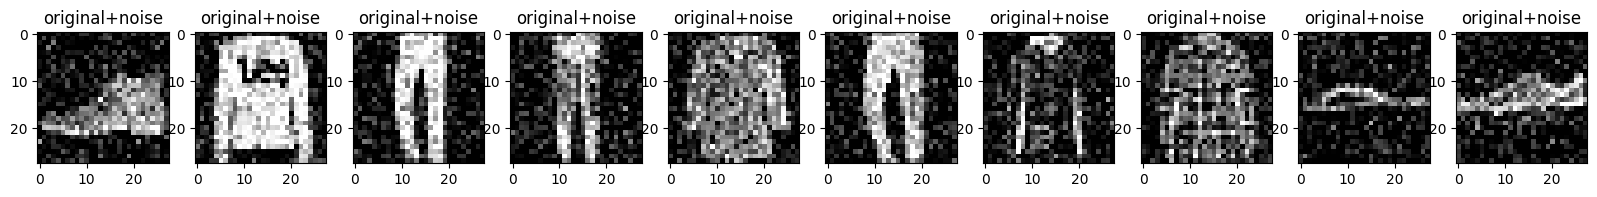

In [20]:
n=10
plt.figure(figsize=(20,2))
for i in range(n):
  ax=plt.subplot(1,n,i+1)
  plt.title('original+noise')
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
plt.show()

In [21]:
class Denoise(Model):
  def __init__(self):
    super(Denoise,self).__init__()
    self.encoder=tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=2), # 14 x 14 x 16
        layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=2)   #  7 x  7 x  8
    ])
    # Conv2DTranspose = Conv2D + Upsampling 결합 
    self.decoder=tf.keras.Sequential([
        layers.Conv2DTranspose(8,kernel_size=3,strides=2,activation='relu',padding='same'), # 14 x 14 x 8
        layers.Conv2DTranspose(16,kernel_size=3,strides=2,activation='relu',padding='same'),# 28 x 28 x 16
        layers.Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same') # 28 x 28 x 1
    ])
  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded
autoencoder=Denoise()
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [ ]:
# 문제
# stride를 사용하는 것과 pooling을 사용하는 것 중에 어떤 것이 유리한가
# : pooling
# stride는 계산이 안 되는 부분이 있음
# Conv2D + Upsampling을 사용하는 것과 Conv2DTranspose를 사용하는 것 중에 어느 것이 유리한가?
# : Conv2DTranspose 촘촘하게 계산

In [23]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,shuffle=True,
                validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0175 - val_loss: 0.0106
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [25]:
encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

In [29]:
encoded_imgs.shape

(10000, 7, 7, 8)

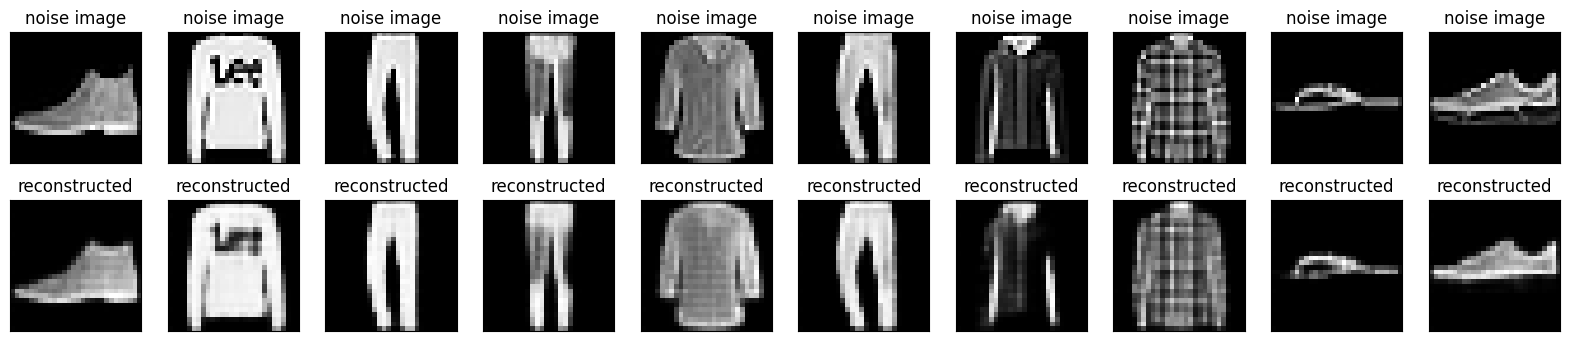

In [28]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title('noise image') # 원본 이미지
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title('reconstructed') # 재구축이미지
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
# 문제 
# 위의 encoder와 decoder의 가중치를 확인해보시오

encoder_weights = autoencoder.encoder.get_weights()
decoder_weights = autoencoder.decoder.get_weights()

print("Encoder Weights:")
for i, w in enumerate(encoder_weights):
    print(f"Layer {i+1}: {w.shape}")

print("\nDecoder Weights:")
for i, w in enumerate(decoder_weights):
    print(f"Layer {i+1}: {w.shape}")

# 추출된 압축 특징 결과를 분류기에서 사용할 수 있도록 fully connected시키시오


Encoder Weights:
Layer 1: (3, 3, 1, 16)
Layer 2: (16,)
Layer 3: (3, 3, 16, 8)
Layer 4: (8,)

Decoder Weights:
Layer 1: (3, 3, 8, 8)
Layer 2: (8,)
Layer 3: (3, 3, 16, 8)
Layer 4: (16,)
Layer 5: (3, 3, 16, 1)
Layer 6: (1,)


In [31]:
autoencoder.encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [32]:
autoencoder.decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


# LSTM을 이용해서 AutoEncoder 모델을 학습
# Bearing 데이터를 이용해서 abnormal detection(이상탐지)
  - threshold를 결정(이상여부결정)
  - 비지도학습으로 결정
# AE모델에서 정상과 비정상
# 경계선을 결정
# 완벽한 모델은 이상이 없는 데이터를 100% 확률로 분류해 내야함
# 이상탐지로 전처리 후에 모델 적용하는 것이 100% 완전 자동화를 위한 방법 - 수작업 적용
# 계란 선별기 ( 앞 사람2사람 세척 )

# 지도학습인 경우에도 이상탐지를 이용해서 확인하는 것이 중요
# 모델이 완성되면 오분류 여부를 확인 할 수 없음

In [ ]:
print(encoded_imgs.shape)
encoded_features=encoded_imgs.reshape(10000,-1) # 분류기의 입력으로 사용가능
# AE를 이용해서 PCA를 적용한 것과 같은 의미의 데이터를 생성해서 전달
encoded_features.shape 

In [26]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/daejeon_1/DataSet/Sensor Data/Bearing_Sensor_Data_pt1.zip'
extract_path = '/content/data/bearing_data'

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [27]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/daejeon_1/DataSet/Sensor Data/Bearing_Sensor_Data_pt2.zip'
extract_path = '/content/data/bearing_data'

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 사용데이터
# 진동데이터 : vibration -> 자동화기기(이송,사각,다듬->회전)
# 회전 -> bearing -> sound를 저장
# 정상/비정상일 때 사운드가 다름(model이 구분) -> 고장(앞으로 1달 후에 고장날 소리)
# 보수

In [39]:
import os 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from numpy.random import seed
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.layers import Input,Dropout,Dense,LSTM,TimeDistributed,RepeatVector
from keras.models import Model
from keras import regularizers

In [40]:
seed(10)
tf.random.set_seed(10)

In [43]:
# 저장된 데이터에 불필요한 내용(데이터가 맥에서 처리)
!rm -r /content/data/bearing_data/__MACOSX # recursive 밑에 데이터가 있더라도

In [44]:
data_dir='/content/data/bearing_data'
merged_data=pd.DataFrame()
for filename in os.listdir(data_dir):
  dataset=pd.read_csv(os.path.join(data_dir,filename),sep='\t')
  dataset_mean_abs=np.array(dataset.abs().mean())
  dataset_mean_abs=pd.DataFrame(dataset_mean_abs.reshape(1,4))
  dataset_mean_abs.index=[filename]
  merged_data=merged_data.append(dataset_mean_abs)
merged_data.columns=['Bearing 1','Bearing 2', 'Bearing 3','Bearing 4']

<ipython-input-44-bc2aff02f09a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data=merged_data.append(dataset_mean_abs)
<ipython-input-44-bc2aff02f09a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data=merged_data.append(dataset_mean_abs)
<ipython-input-44-bc2aff02f09a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data=merged_data.append(dataset_mean_abs)
<ipython-input-44-bc2aff02f09a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data=merged_data.append(dataset_mean_abs)
<ipython-input-44-bc2aff02f09a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [45]:
merged_data.index=pd.to_datetime(merged_data.index,format='%Y.%m.%d.%H.%M.%S')
merged_data=merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print('Dataset shape:',merged_data.shape)
merged_data.head()

Dataset shape: (982, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [46]:
# timeseries 데이터 
train=merged_data['2004-02-12 10:52:39' : '2004-02-15 12:52:39']
test=merged_data['2004-02-15 12:52:39':]
print('Training dataset shape:',train.shape)
print('Test dataset shape:',test.shape)

Training dataset shape: (445, 4)
Test dataset shape: (538, 4)


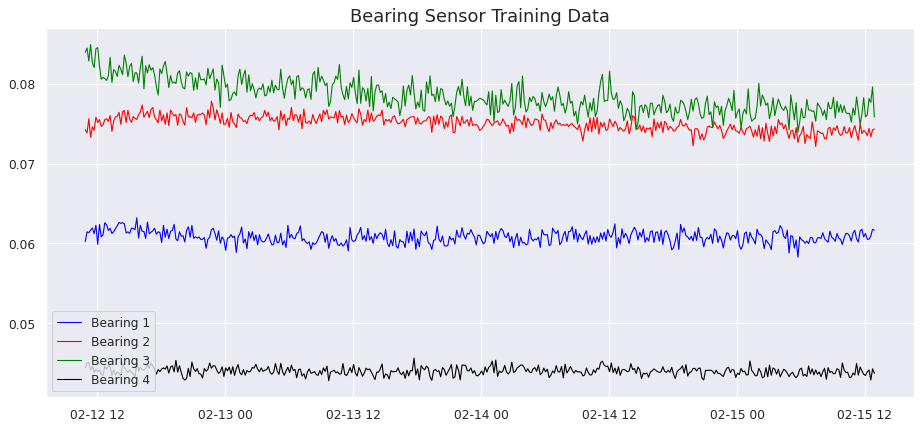

In [47]:
fig,ax=plt.subplots(figsize=(14,6),dpi=80)
ax.plot(train['Bearing 1'],label='Bearing 1',color='blue',animated=True,linewidth=1)
ax.plot(train['Bearing 2'],label='Bearing 2',color='red',animated=True,linewidth=1)
ax.plot(train['Bearing 3'],label='Bearing 3',color='green',animated=True,linewidth=1)
ax.plot(train['Bearing 4'],label='Bearing 4',color='black',animated=True,linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data',fontsize=16)
plt.show()

In [48]:
# 센서 데이터 정규화
scaler=MinMaxScaler()
X_train=scaler.fit_transform(train)
X_test=scaler.transform(test)
scaler_filename='scaler_data'
joblib.dump(scaler,scaler_filename)

['scaler_data']

In [49]:
# LSTM 데잍어 입력 순서에 맞춰 reshape(samples, timesteps, features)
X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test=X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [54]:
# AE : LSTM으로 구현 - 시계열 데이터 특징 추출
#                                  samples, timesteps, features
def autoencoder_model(X): # 인덱스 0,1,2
  inputs=Input(shape=(X.shape[1],X.shape[2]))
  L1=LSTM(16,activation='relu',return_sequences=True, # timesteps 개수만큼 출력
          kernel_regularizer=regularizers.l2(0.00))(inputs)
  L2=LSTM(4,activation='relu',return_sequences=False)(L1) # 특징 추출
  # 마지막 hidden state를 사용
  L3=RepeatVector(X.shape[1])(L2) # timesteps만큼 반복해서 데이터를 생성
  L4=LSTM(4,activation='relu',return_sequences=True)(L3)
  L5=LSTM(16,activation='relu',return_sequences=True)(L4)
  output=TimeDistributed(Dense(X.shape[2]))(L5) # 입력데이터를 시간순으로 합하여 출력
  model=Model(inputs=inputs,outputs=output)
  return model

In [55]:
model=autoencoder_model(X_train)
model.compile(optimizer='adam',loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                                 
 lstm_4 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_6 (LSTM)               (None, 1, 16)             1344      
                                                             

In [56]:
nb_epochs=100
batch_size=10
history=model.fit(X_train,X_train,epochs=nb_epochs,batch_size=batch_size,
                  validation_split=0.05).history

Epoch 1/100
43/43 [==============================] - 7s 30ms/step - loss: 0.4486 - val_loss: 0.3275
Epoch 2/100
43/43 [==============================] - 1s 27ms/step - loss: 0.3975 - val_loss: 0.2726
Epoch 3/100
43/43 [==============================] - 2s 36ms/step - loss: 0.3352 - val_loss: 0.2085
Epoch 4/100
43/43 [==============================] - 1s 27ms/step - loss: 0.2259 - val_loss: 0.1559
Epoch 5/100
43/43 [==============================] - 1s 17ms/step - loss: 0.1295 - val_loss: 0.1195
Epoch 6/100
43/43 [==============================] - 1s 18ms/step - loss: 0.1046 - val_loss: 0.1158
Epoch 7/100
43/43 [==============================] - 1s 17ms/step - loss: 0.1020 - val_loss: 0.1156
Epoch 8/100
43/43 [==============================] - 1s 17ms/step - loss: 0.1015 - val_loss: 0.1150
Epoch 9/100
43/43 [==============================] - 1s 18ms/step - loss: 0.1014 - val_loss: 0.1150
Epoch 10/100
43/43 [==============================] - 1s 17ms/step - loss: 0.1012 - val_loss: 0.1143

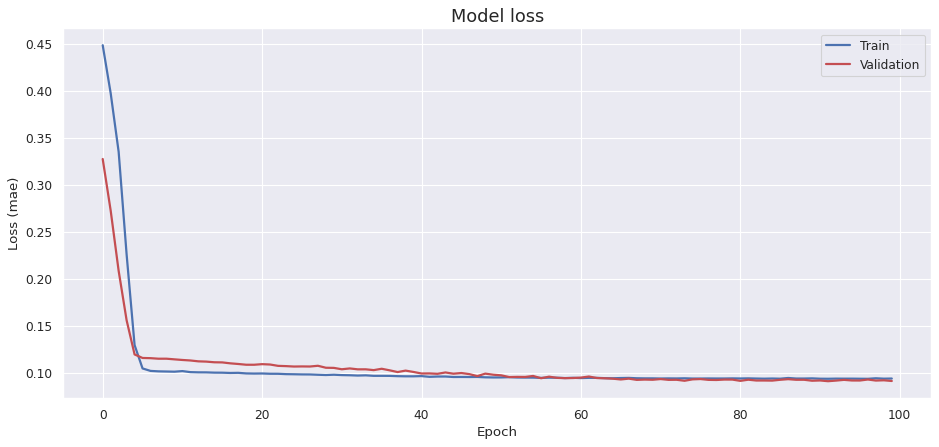

In [57]:
fig,ax=plt.subplots(figsize=(14,6),dpi=80)
ax.plot(history['loss'],'b',label='Train',linewidth=2)
ax.plot(history['val_loss'],'r',label='Validation',linewidth=2)
ax.set_title('Model loss',fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

14/14 [==============================] - 0s 3ms/step


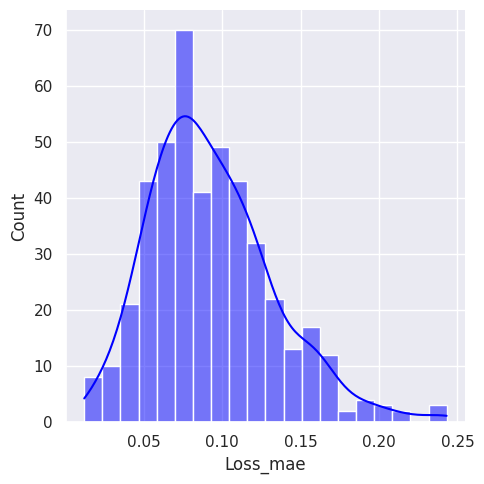

In [60]:
# LSTM( samples, timesteps, features) 입력 1차원 추가된
X_pred=model.predict(X_train)
X_pred=X_pred.reshape(X_pred.shape[0],X_pred.shape[2])
X_pred=pd.DataFrame(X_pred,columns=train.columns)
X_pred.index=train.index

scored=pd.DataFrame(index=train.index)
Xtrain=X_train.reshape(X_train.shape[0],X_train.shape[2])
scored['Loss_mae']=np.mean(np.abs(X_pred-Xtrain),axis=1)
# plt.figure(figsize=(16,9),dpi=80)
# plt.title('Loss Distribution',fontsize=16)
sns.displot(scored['Loss_mae'],bins=20,kde=True,color='blue')
# 분포도

In [63]:
X_pred=model.predict(X_test)
X_pred=X_pred.reshape(X_pred.shape[0],X_pred.shape[2])
X_pred=pd.DataFrame(X_pred,columns=train.columns)
X_pred.index=test.index

scored=pd.DataFrame(index=test.index)
Xtest=X_test.reshape(X_test.shape[0],X_test.shape[2])
scored['Loss_mae']=np.mean(np.abs(X_pred-Xtest),axis=1)
scored['Threshold']=0.24 # 문지방
scored['Anomaly']=scored['Loss_mae']>scored['Threshold']
scored.head()

17/17 [==============================] - 0s 3ms/step


,Loss_mae,Threshold,Anomaly
2004-02-15 12:52:39,0.089341,0.24,False
2004-02-15 13:02:39,0.176073,0.24,False
2004-02-15 13:12:39,0.063133,0.24,False
2004-02-15 13:22:39,0.063967,0.24,False
2004-02-15 13:32:39,0.046393,0.24,False


In [64]:
X_pred_train=model.predict(X_train)
X_pred_train=X_pred_train.reshape(X_pred_train.shape[0],X_pred_train.shape[2])
X_pred_train=pd.DataFrame(X_pred_train,columns=train.columns)
X_pred_train.index=train.index

scored_train=pd.DataFrame(index=train.index)
scored_train['Loss_mae']=np.mean(np.abs(X_pred_train-Xtrain),axis=1)
scored_train['Threshold']=0.275 # 문지방
scored_train['Anomaly']=scored_train['Loss_mae']>scored_train['Threshold']
scored=pd.concat([scored_train,scored])

14/14 [==============================] - 0s 3ms/step


<Axes: >

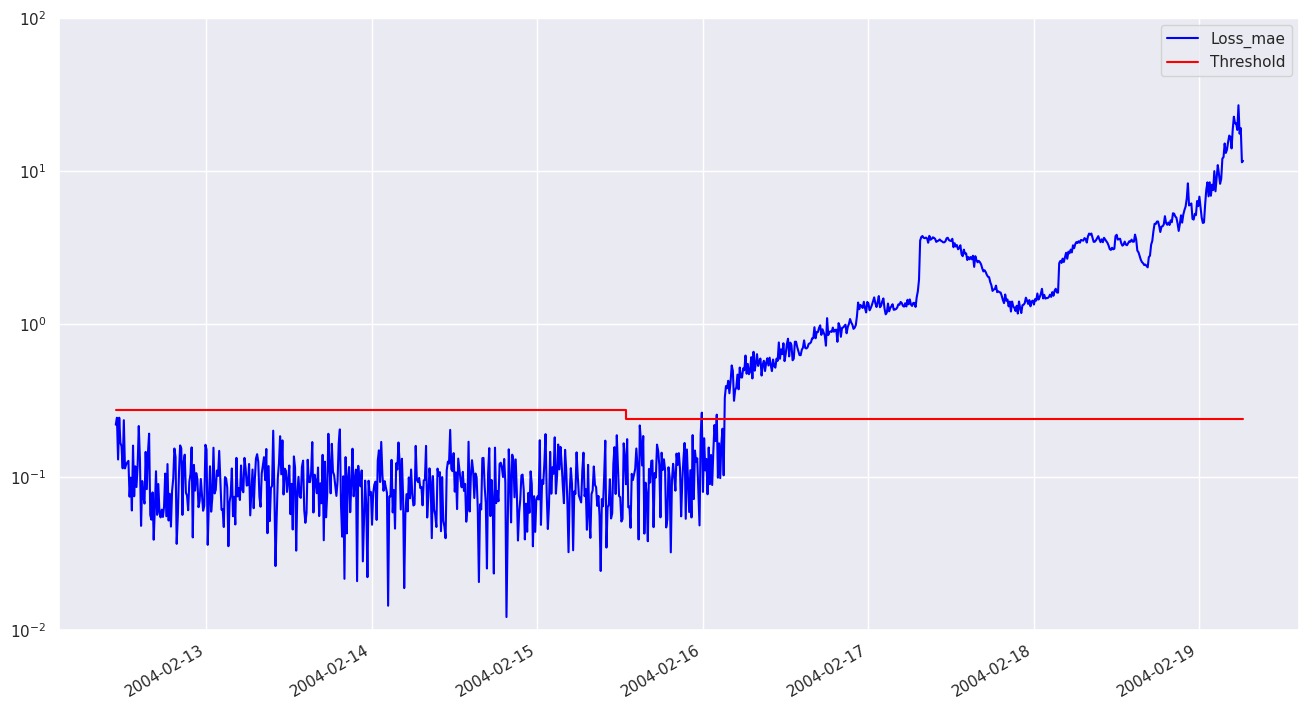

In [65]:
scored.plot(logy=True,figsize=(16,9),ylim=[1e-2,1e2],color=['blue','red'])

In [66]:
model.save('/content/drive/MyDrive/daejeon_1/DataSet/Sensor Data')
print('Model saved')

Model saved


# GAN

In [67]:
import os
if not os.path.exists('./gan_images'):
  os.makedirs('./gan_images')
np.random.seed(3)
tf.random.set_seed(3)

In [10]:
from tensorflow.keras.layers import BatchNormalization,Activation,LeakyReLU,Dense,Reshape,UpSampling2D,Conv2D
from tensorflow.keras.models import Sequential

# fake 이미지 생성
generator=Sequential()
# 1차원으로 데이터 입력 : random 으로 부터 학습된 가중치로 이미지를 생성
# 실제 서비스 하는 망
generator.add(Dense(128*7*7,input_dim=100,activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())# -1~ 1 분포로 재조정(통계학)
generator.add(Reshape((7,7,128)))#이미지의 기본
generator.add(UpSampling2D())# 14x14x128
generator.add(Conv2D(64,kernel_size=5,padding='same')) # 14x14x64
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2))) # -1까지만 고려
generator.add(UpSampling2D()) # 28x28x64
generator.add(Conv2D(1,kernel_size=5,padding='same',activation='tanh'))#28x28x1->이미지 사이즈

In [13]:
# 분별기
from tensorflow.keras.layers import Dropout,Flatten

discriminator=Sequential()
discriminator.add(Conv2D(64,kernel_size=5,strides=2,input_shape=(28,28,1),padding='same')) # 14x14x64
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten()) # 7*7*128
discriminator.add(Dense(1,activation='sigmoid')) # true/false
discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.trainable=False

In [17]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

ginput=Input(shape=(100,))
dis_output=discriminator(generator(ginput))
gan=Model(ginput,dis_output)
gan.compile(loss='binary_crossentropy',optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_6 (Sequential)   (None, 28, 28, 1)         865281    
                                                                 
 sequential_9 (Sequential)   (None, 1)                 14209     
                                                                 
Total params: 879,490
Trainable params: 852,609
Non-trainable params: 26,881
_________________________________________________________________


In [31]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
if not os.path.exists('gan_images'):
    os.makedirs('gan_images')

def gan_train(epoch,batch_size,saving_interval):
  (X_train,_),(_,_)=mnist.load_data()
  X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
  X_train=(X_train-127.5)/127.5
  true=np.ones((batch_size,1))
  fake=np.zeros((batch_size,1))
  for i in range(epoch):
    idx=np.random.randint(0,X_train.shape[0],batch_size)
    imgs=X_train[idx]
    # fit, train_on_batch
    # 일관성 있는 학습 (항상 사이즈가 같은 것 일 때)
    # train_on_batch(배치 사이즈 변화될 때도 사용가능하고 동일 할 때 사용할 수)
    d_loss_real=discriminator.train_on_batch(imgs,true) # 참인 경우
    noise=np.random.normal(0,1,(batch_size,100)) # 이미지를 noise로
    gen_imgs=generator.predict(noise)
    d_loss_fake=discriminator.train_on_batch(gen_imgs,fake)
    d_loss=0.5*np.add(d_loss_real,d_loss_fake) # 반 씩 영향을 미치도록 
    g_loss=gan.train_on_batch(noise,true)
    print('epoch:%d'%i,'d_loss:%.4f'%d_loss,'g_loss:%.4f'%g_loss)
    #중간중간 ㅇ미ㅣ지를 저장해서 gan이 학습해가는 것을 확인하는 회로
    if i % saving_interval==0:
      noise=np.random.normal(0,1,(25,100))
      gen_imgs=generator.predict(noise)
      gen_imgs=0.5*gen_imgs+0.5

      fig,axs=plt.subplots(5,5)
      count=0
      for j in range(5):
        for k in range(5):
          axs[j,k].imshow(gen_imgs[count,:,:,0],cmap='gray')
          axs[j,k].axis('off')
          count+=1
      fig.savefig('gan_images/gan_mnist_%d.png'%i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 180ms/step
epoch:1508 d_loss:0.8083 g_loss:0.9416
1/1 [==============================] - 0s 176ms/step
epoch:1509 d_loss:0.9182 g_loss:0.9986
1/1 [==============================] - 0s 150ms/step
epoch:1510 d_loss:1.2247 g_loss:0.8063
1/1 [==============================] - 0s 104ms/step
epoch:1511 d_loss:0.8305 g_loss:0.8799
1/1 [==============================] - 0s 97ms/step
epoch:1512 d_loss:0.8974 g_loss:0.7112
1/1 [==============================] - 0s 102ms/step
epoch:1513 d_loss:0.7509 g_loss:0.8839
1/1 [==============================] - 0s 97ms/step
epoch:1514 d_loss:0.9105 g_loss:0.8681
1/1 [==============================] - 0s 98ms/step
epoch:1515 d_loss:0.7230 g_loss:1.0553
1/1 [==============================] - 0s 89ms/step
epoch:1516 d_loss:0.6835 g_loss:1.2121
1/1 [==============================] - 0s 95ms/step
epoch:1517 d_loss:0.6072 g_loss:1.2243
1/1 [==============================] - 0s 87ms/st

<ipython-input-31-7e52b9058eaf>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs=plt.subplots(5,5)


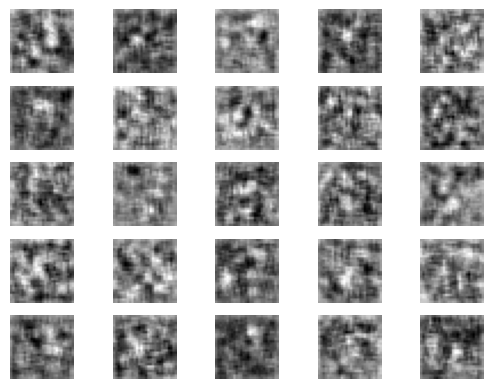

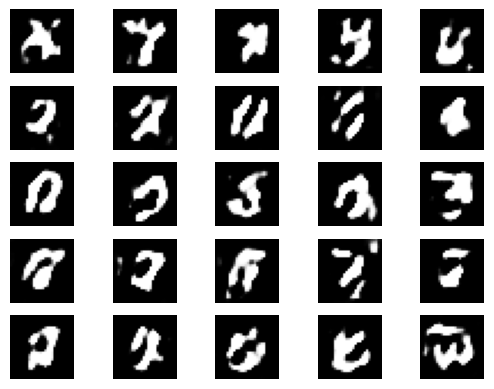

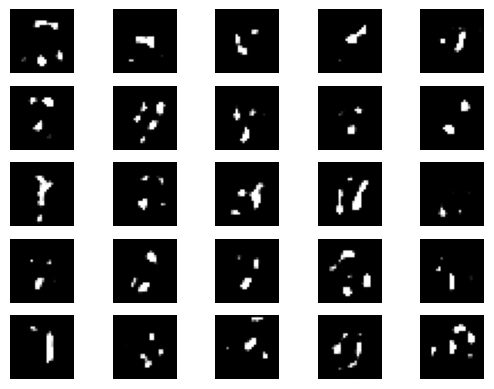

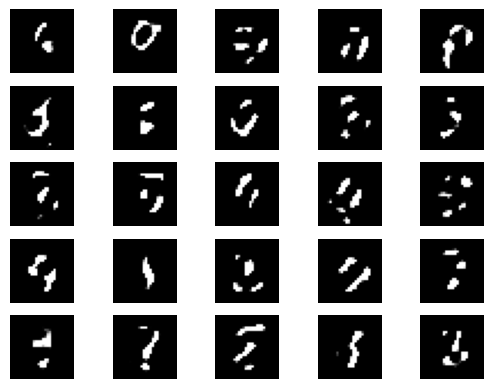

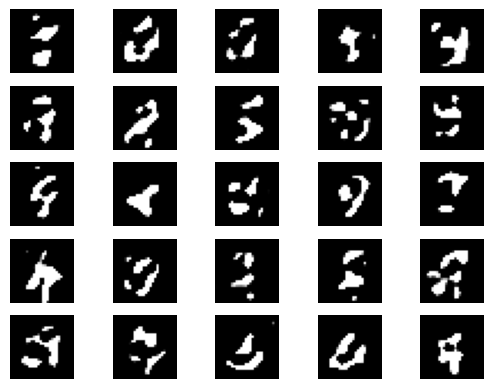

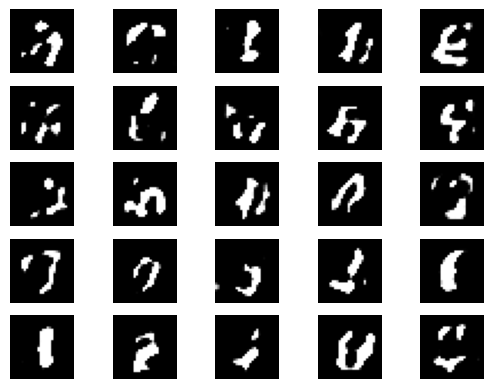

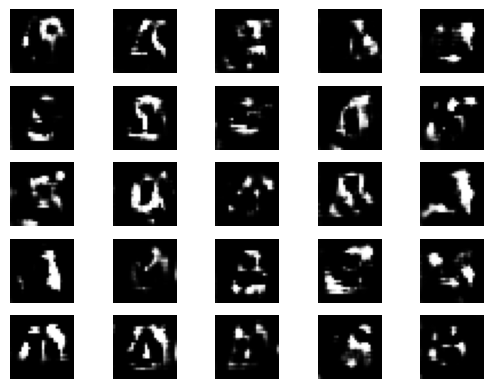

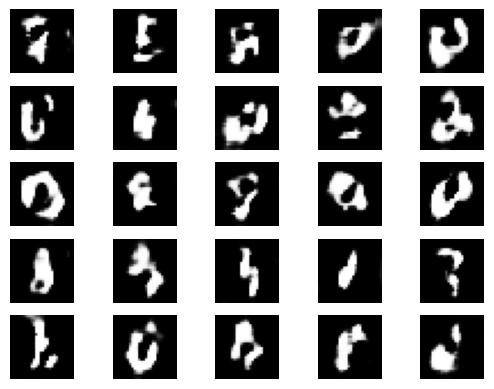

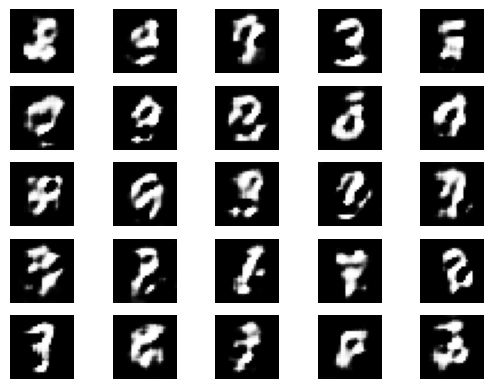

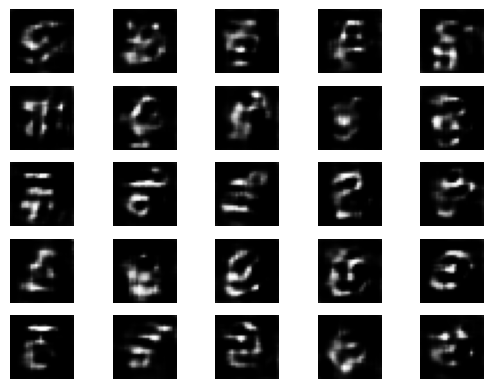

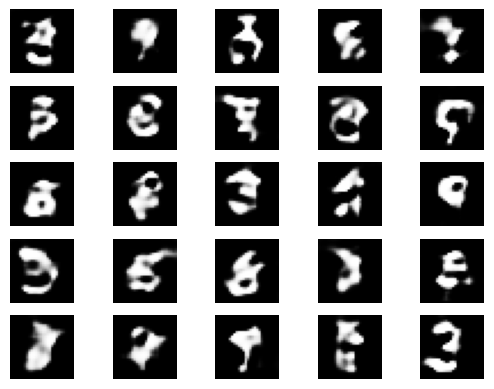

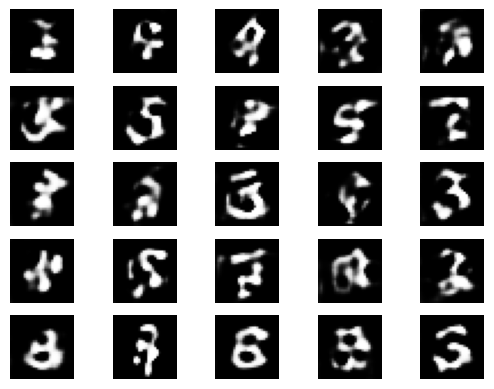

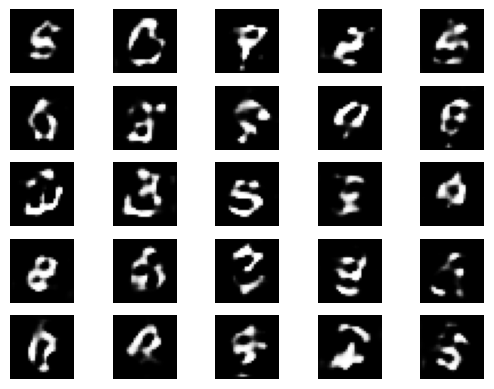

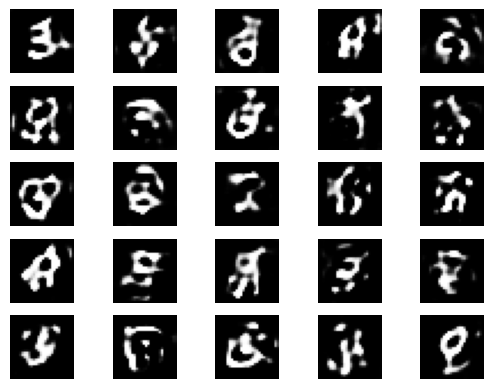

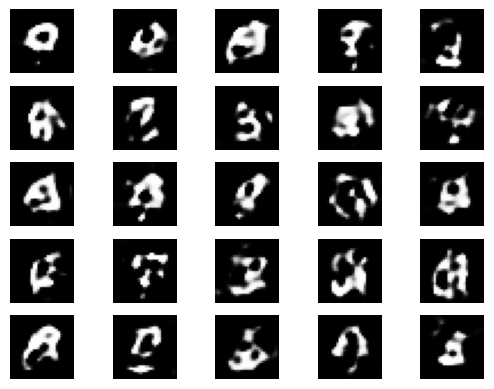

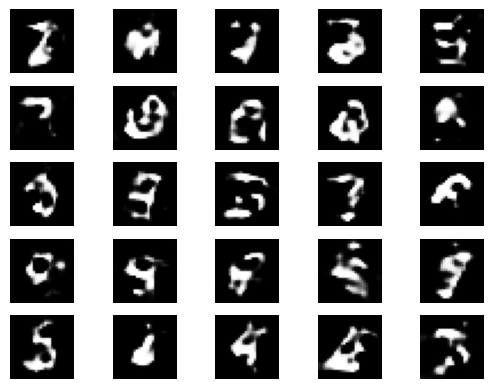

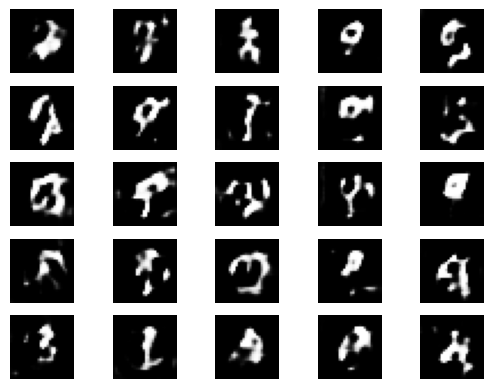

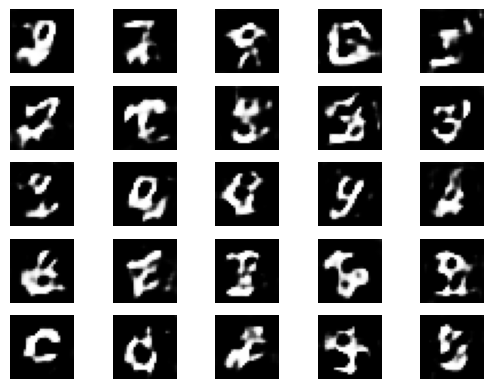

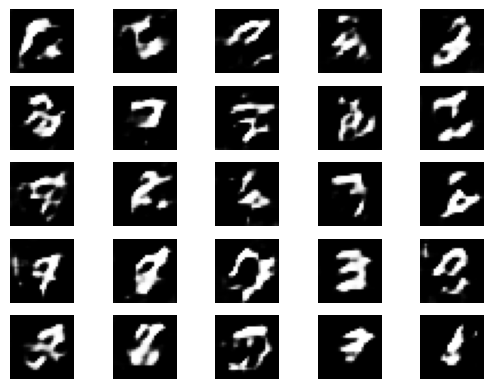

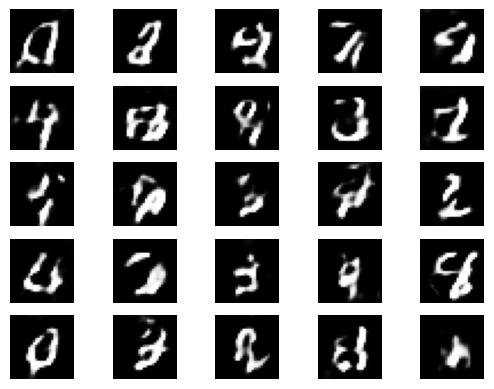

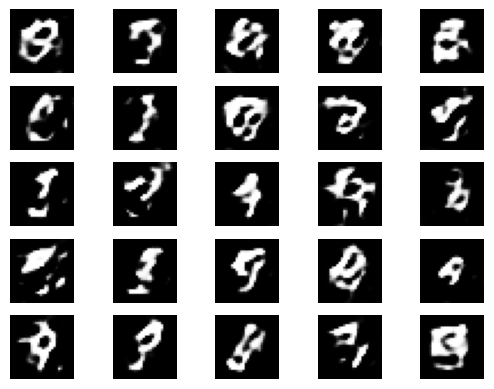

In [32]:
gan_train(4001,32,200)

In [ ]:
# 문제 
# 이미지를 랜덤으로 생성한 다음에 이미지를 predict해서 출력
generator.save('/content/drive/MyDrive/daejeon_1/models (1)/230607')

In [33]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
model=keras.models.load_model('')
noise=np.random.normal(0,1,(25,100))
gen_imgs=model.predict(noise)
gen_imgs=0.5*gen_imgs+0.5
fig,axs=plt.subplot(5,5)
count=0
for j in range(5):
  for k in range(5):
    axs[j,k].imshow(gen_imgs[count,:,:,0],cmap='gray')
    axs[j,k].axis('off')
    count+=1

OSError: ignored